In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import clear_output

In [2]:
def plot(points1, points2, a, b):
    # Extract x and y coordinates from the points
    # Extract x and y coordinates from the points
    x1, y1 = zip(*points1)
    x2, y2 = zip(*points2)
    
    # Create a NumPy array for the x values of the linear function
    x_linear = np.linspace(-5, 5, 100)
    
    # Calculate y values for the linear function
    try:
        a = a[1] / a[0]
    except NullDivisionError:
        a = 0
    try:
        y_linear = (1 / -a) * x_linear
    except NullDivisionError:
        y_linear = 0

    
    # Fill the area above the linear function with pale colors
    plt.fill_between(x_linear, y_linear, 5, color='lightcoral', alpha=0.5)
    plt.fill_between(x_linear, y_linear, -5, color='lightblue', alpha=0.5)

        # Plot the points with red and blue colors
    plt.scatter(x1, y1, color='red', label='Points 1')
    plt.scatter(x2, y2, color='blue', label='Points 2')
    
    # Plot the linear function with a black color
    plt.plot(x_linear, y_linear, color='black')
    
    # Set x and y axis limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    # Set labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot with Linear Function and Fill')
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()
    clear_output(wait=True)

In [3]:
def generate_points(n):
    w = (random.random() * 10 - 5) * random.choice([-1, 1])
    b = (random.random() * 5 - 2.5) * random.choice([-1, 1])

    points1 = []
    points2 = []

    while len(points1) < n or len(points2) < n:
        point = (random.random() * 10 - 5, random.random() * 10 - 5)
        if point[0] * w + b < point[1] and len(points1) < n:
            points1.append(point)
        elif point[0] * w + b > point[1] and len(points2) < n:
            points2.append(point)
    return points1, points2, w, b

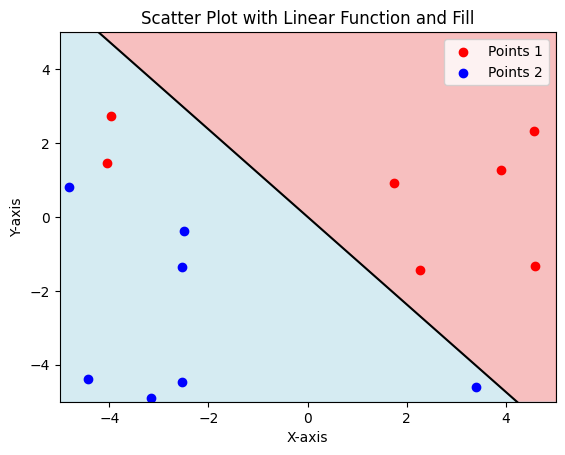

In [ ]:
p1, p2, w, b  = generate_points(7)
linear_separation(p1, p2)


In [9]:
def linear_separation(points1, points2):
    w = (0, 0)
    b = 0

    points = [(point, 0.6) for point in points1] + [(point, -0.6) for point in points2]
    random.shuffle(points)

    n_points = len(points)
    counter = 0
    run = True
    
    while run:
        for i in range(len(points)):
            point = points[i]
            linear_eval = linear_classifier(w, point[0], b, point[1])
            # znaménka nesedí
            if not linear_eval:
                counter = 0
                # přepočet w a b
                w = (w[0] + point[0][0] * point[1], w[1] + point[0][1] * point[1] )
                b = b + point[1]
            else:
                counter += 1
            if counter > n_points:
                run = False
                break
            plot(points1, points2, w, b)

    plot(points1, points2, w, b)

In [6]:
def linear_classifier(w, x, b, y):
    eval = w[0] * x[0] + w[1] * x[1] + b
    return (eval * y) > 0